# Text Classification for Customer Complaints in pure Python

## Import packages

In [1]:
#Import Packages
import os
import pandas as pd
import numpy as np

# Get the data ready

In [2]:
# Load data from CAS to python #
df = pd.read_csv('Customer_Complaints.csv')
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,12/10/2018,Mortgage,Conventional home mortgage,Struggling to pay mortgage,NaN,XX/XX/XXXX Corporate Offices Wells Fargo XXXX ...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,FL,333XX,NaN,Consent provided,Web,12/10/2018,Closed with explanation,Yes,NaN,3097002
1,12/10/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Problem with personal statement of dispute,Violation of sec 609 ( correct inaccuracies ) ...,NaN,EXETER FINANCE CORP.,LA,NaN,Servicemember,Consent provided,Web,12/10/2018,Closed with explanation,Yes,NaN,3096302
2,12/10/2018,Debt collection,Credit card debt,Written notification about debt,Didn't receive enough information to verify debt,I sent Equifax multiple letters to verify this...,NaN,"EQUIFAX, INC.",FL,327XX,NaN,Consent provided,Web,12/10/2018,Closed with explanation,Yes,NaN,3095735
3,12/10/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I paid a loan in full on XX/XX/2018. I filed a...,NaN,"EQUIFAX, INC.",CO,815XX,NaN,Consent provided,Web,12/10/2018,Closed with explanation,Yes,NaN,3097069
4,12/10/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Unable to get your credit report or credit score,Problem getting your free annual credit report,every year i tried to get my credit report i b...,NaN,"EQUIFAX, INC.",NJ,NaN,NaN,Consent provided,Web,12/10/2018,Closed with explanation,Yes,NaN,3097052


In [3]:
#Check the shape of the dataset
df.shape

(24140, 18)

In [4]:
# unique values of products and sub-products
df['Product'].nunique() #9
df['Sub-product'].nunique() # 46

46

In [5]:
#Check count of different sub-products
df['Sub-product'].value_counts()[:5] 
#Credit reporting is the biggest group 10008 count

Credit reporting                              10008
General-purpose credit card or charge card     1872
Checking account                               1362
Other debt                                     1355
Conventional home mortgage                     1210
Name: Sub-product, dtype: int64

In [6]:
#Check count of different products
df['Product'].value_counts()[:5] 
#Credit reporting, credit repair services, or other personal consumer reports is the biggest group 10209

Credit reporting, credit repair services, or other personal consumer reports    10209
Debt collection                                                                  4927
Credit card or prepaid card                                                      2457
Mortgage                                                                         2074
Checking or savings account                                                      1634
Name: Product, dtype: int64

In [7]:
#Finding the the count and percentage of values that are missing in the dataframe
data_null = pd.DataFrame({'Count': df.isnull().sum(), 'Percent': 100*df.isnull().sum()/len(df)})

#printing columns with more than 30% missing values
data_null[data_null['Percent'] >= 30].sort_values(by='Percent', ascending=False)

#Text column does not have missing values

,Count,Percent
Consumer disputed?,24140,100.000000
Tags,19915,82.497929
Company public response,12077,50.028998



## Split data to get a smaller subset of the data >> Python cannot handle a big dataset

In [8]:
#Create a train-validate-test-split function
def train_validate_test_split(df, train_percent=.6, validate_percent=.3):
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.loc[perm[:train_end]]
    validate = df.loc[perm[train_end:validate_end]]
    test = df.loc[perm[validate_end:]]
    return train, validate, test

train, validate, test = train_validate_test_split(df)
print('train:',train.shape)
print('validation:',validate.shape)
print('test:',test.shape)

train.reset_index(inplace=True, drop=True) #14484 obs, 18 vars
validate.reset_index(inplace=True, drop=True) #7242 obs, 18 vars
test.reset_index(inplace=True, drop=True) #2414 obs, 18 vars

train: (14484, 18)
validation: (7242, 18)
test: (2414, 18)


In [9]:
test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,1/7/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,I am a victim of identity theft. My personal i...,NaN,"EQUIFAX, INC.",CA,945XX,NaN,Consent provided,Web,1/7/2019,Closed with non-monetary relief,Yes,NaN,3118775
1,1/17/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,"Chase Auto Finance, End of Lease Division, mai...",NaN,JPMORGAN CHASE & CO.,ME,043XX,NaN,Consent provided,Web,1/17/2019,Closed with non-monetary relief,Yes,NaN,3127202
2,1/14/2019,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was result of identity theft,I noticed a debt on my credit report That's ke...,NaN,PORTFOLIO RECOVERY ASSOCIATES INC,PA,191XX,Servicemember,Consent provided,Web,1/14/2019,Closed with explanation,Yes,NaN,3124226
3,3/4/2019,Debt collection,Other debt,Written notification about debt,Didn't receive notice of right to dispute,I tried to apply for a car loan and discovered...,Company believes it acted appropriately as aut...,"Waypoint Resource Group, LLC",NM,871XX,NaN,Consent provided,Web,3/8/2019,Closed with explanation,Yes,NaN,3168736
4,12/11/2018,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,"XXXX, Credit Reporting Agency has made it diff...",Company has responded to the consumer and the ...,Experian Information Solutions Inc.,NY,117XX,NaN,Consent provided,Web,12/11/2018,Closed with explanation,Yes,NaN,3097186


In [10]:
#Create time functions
import time
import datetime

path = 'C:/Users/canyzn/Downloads/TextAnalytics/'

start = datetime.datetime.now()
print(start)

for index, row in test.iterrows():
    
    if index > len(test):
        break
    else:
        f = open(path+'document '+str(index)+'.txt', 'w', encoding='utf-8')
        f.write(str(row[0]) + ' *** ')
        f.write(row[5])
        f.close()
        index+=1

end = datetime.datetime.now()
print(end)
print('total:', end-start)

2020-06-03 15:59:27.549445
2020-06-03 15:59:29.284453
total: 0:00:01.735008


In [11]:
#Look at the complaint text
df['Consumer complaint narrative'].head()

0    XX/XX/XXXX Corporate Offices Wells Fargo XXXX ...
1    Violation of sec 609 ( correct inaccuracies ) ...
2    I sent Equifax multiple letters to verify this...
3    I paid a loan in full on XX/XX/2018. I filed a...
4    every year i tried to get my credit report i b...
Name: Consumer complaint narrative, dtype: object

In [12]:
#Check the complaint text in the test dataset
for index, row in test.iterrows():
    if index <= 5:
        print()
        print(row[5])


I am a victim of identity theft. My personal information was compromised and fraudulent accounts were opened without my consent or authorization. 
As a result, I sent this company my dispute letter on XX/XX/XXXX explaining my case. I even attached Identity Theft Report, Proof of identity and Section 605B of the Fair Credit Reporting Act. 
But to my surprise, this company up to now failed miserably to investigate my claims and is still reporting this fraudulent accounts. For yet another last time, the following accounts are as a result of fraud : XXXX  XXXX/XXXX, ACC # XXXX, Opened Date XX/XX/XXXX, Highest Balance {$590.00} XXXX  XXXX/XXXX, ACC # XXXX, Opened Date XX/XX/XXXX, Highest Balance {$1300.00} XXXX/XXXX, ACC # XXXX, Opened Date XX/XX/XXXX, Highest Balance {$1600.00} XXXX  XXXX XXXX, ACC XXXX XXXX, Opened Date XX/XX/XXXX, Highest Balance {$8500.00} XXXX XXXX XXXX  XXXX, ACC XXXX XXXX, Opened Date XX/XX/XXXX, Highest Balance {$620.00} This letter is a written proof of my intent 

In [13]:
#Check the date in the test dataset
for index, row in test.iterrows():
    if index <= 5:
        print()
        print(row[0])


1/7/2019

1/17/2019

1/14/2019

3/4/2019

12/11/2018

2/25/2019


In [14]:
#Print only date and text
for index, row in test.iterrows():
    if index <= 5:
        print()
        print(row[0], row[5])


1/7/2019 I am a victim of identity theft. My personal information was compromised and fraudulent accounts were opened without my consent or authorization. 
As a result, I sent this company my dispute letter on XX/XX/XXXX explaining my case. I even attached Identity Theft Report, Proof of identity and Section 605B of the Fair Credit Reporting Act. 
But to my surprise, this company up to now failed miserably to investigate my claims and is still reporting this fraudulent accounts. For yet another last time, the following accounts are as a result of fraud : XXXX  XXXX/XXXX, ACC # XXXX, Opened Date XX/XX/XXXX, Highest Balance {$590.00} XXXX  XXXX/XXXX, ACC # XXXX, Opened Date XX/XX/XXXX, Highest Balance {$1300.00} XXXX/XXXX, ACC # XXXX, Opened Date XX/XX/XXXX, Highest Balance {$1600.00} XXXX  XXXX XXXX, ACC XXXX XXXX, Opened Date XX/XX/XXXX, Highest Balance {$8500.00} XXXX XXXX XXXX  XXXX, ACC XXXX XXXX, Opened Date XX/XX/XXXX, Highest Balance {$620.00} This letter is a written proof of m

## Building models

source: https://www.kaggle.com/eliotbarr/text-classification-using-neural-networks

In [15]:
# Import libraries for neural network deep learning algorithms 
import matplotlib.pyplot as plt
np.random.seed(32)
!pip install tensorflow==2.0
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.manifold import TSNE

In [16]:
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM, Conv1D, MaxPooling1D, Dropout
from keras.utils.np_utils import to_categorical


%matplotlib inline

Using TensorFlow backend.


In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
#only do a small subset of test
test2 = test[['Consumer complaint narrative', 'Timely response?']]
test2.info() #2414 obs, 2 vars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 2 columns):
Consumer complaint narrative    2414 non-null object
Timely response?                2414 non-null object
dtypes: object(2)
memory usage: 37.8+ KB


In [19]:
test2.head()

,Consumer complaint narrative,Timely response?
0,I am a victim of identity theft. My personal i...,Yes
1,"Chase Auto Finance, End of Lease Division, mai...",Yes
2,I noticed a debt on my credit report That's ke...,Yes
3,I tried to apply for a car loan and discovered...,Yes
4,"XXXX, Credit Reporting Agency has made it diff...",Yes


In [22]:
complaints_train=test2.loc[0:2000]
complaints_test=test2.loc[2001:2414]

complaints_train.to_csv('complaints_train.csv',index=False)
complaints_test.to_csv('complaints_test.csv',index=False)

### Pre-processing

#### Tokenization

In [36]:
#Transform tokens into vectors
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(test2.Product)
le.transform(test2.Product) 
# le.inverse_transform(test2.Product)

array([1, 0, 4, ..., 2, 2, 7])

In [37]:
#Encoding Product
test2['Target'] = le.transform(test2.Product) 
test2.head(20)

,Consumer complaint narrative,Product,Target
0,"When I log in to my account summary, the "" Min...",Credit card or prepaid card,1
1,The Bank of America has decided to close my ac...,Checking or savings account,0
2,"I am in process of purchasing house, currently...","Money transfer, virtual currency, or money ser...",4
3,I am very concerned about the validity and acc...,"Credit reporting, credit repair services, or o...",2
4,On XX/XX/2019 I called in to make a final paym...,Student loan,7
5,I applied for a mortgage loan and my credit re...,"Credit reporting, credit repair services, or o...",2
6,The interest is very high and almost unmanagea...,"Payday loan, title loan, or personal loan",6
7,Rushmore states that the payoff was good until...,Mortgage,5
8,I have been receiving numerous spoofed callerI...,Debt collection,3
9,TD BANK XXXX hasnt reported my credit card acc...,"Credit reporting, credit repair services, or o...",2


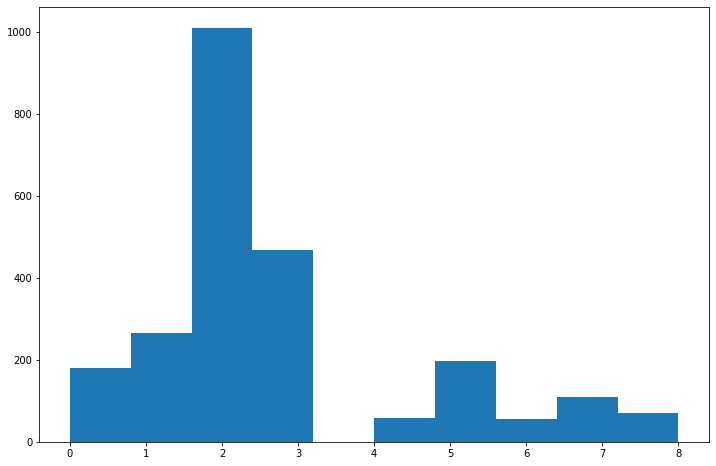

In [38]:
#Check the distribution of Product - Target
plt.figure(figsize=(12,8))
plt.hist(test2['Target']);
 #Mostly Product 2 or Credit Reporting,...

In [41]:
#Split the test data into train and test
train_text, test_text, train_y, test_y = train_test_split(test2['Consumer complaint narrative'],
                                                          test2['Target'],test_size = 0.2)

In [42]:
#Tokenize
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
#9335 unique tokens found

Found 9335 unique tokens.


In [45]:
#Create function to turn index to word
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [52]:
#Check the function
for index, row in train_text.iteritems():
    if index <5:
        print(row)

The Bank of America has decided to close my account without giving me an appropriate response. I spoke to the Bank 's account closing department and they pointed to a customer agreement and they said they took a business decision to close the account and they are not required to provide any reason to me. 

I am operating this account as a joint holder along with my husband since XX/XX/1999. I have been the bank 's customer for over 20 years. I work with a reputed organization and earn annually $ XXXX. I also have a brokerage account with the bank 's brokerage arm ( XXXX XXXX ) with net funds invested over $ 300K. 

There was not a single incident of violation reported on my account from my side in last 20 years. I am a law-abiding permanent resident of the USA. Such an abrupt closing of my account without citing any reason makes me feel the bank has discriminated against me. 

Please look in to this as soon as possible. 

Thanks, XXXX XXXX
I am very concerned about the validity and acc

In [53]:
#Add quotation mark
" ".join([index_to_word[i] for i in sequences[0]])

"in xx xx xxxx xxxx xxxx services began calling my wife about a debt owed in the state of michigan from a doctor visit on xx xx xxxx we used to live in michigan but moved in xxxx we have not traveled back to michigan since moving i explained to the company that the debt was not ours since we have not lived or visited the state in nine years they continued to call and send communications that we owed the debt each time they said they sent us an itemized bill which they did not and talked to the clinic who corroborated it was my wife i asked for them to send me the bill but they never did i didn't hear from them for five months and then they sent a communication in the mail i called back and was told the same thing as before each time i explained it was in error they either hung up on me or said it was our debt this last time on xx xx xxxx i was sent to a supervisor but she has not called me back this debit is not on our credit report each time i tell them this they hang up my wife gave 

In [48]:
#Tokenize with words for one text
[index_to_word[i] for i in sequences[0]]

['in',
 'xx',
 'xx',
 'xxxx',
 'xxxx',
 'xxxx',
 'services',
 'began',
 'calling',
 'my',
 'wife',
 'about',
 'a',
 'debt',
 'owed',
 'in',
 'the',
 'state',
 'of',
 'michigan',
 'from',
 'a',
 'doctor',
 'visit',
 'on',
 'xx',
 'xx',
 'xxxx',
 'we',
 'used',
 'to',
 'live',
 'in',
 'michigan',
 'but',
 'moved',
 'in',
 'xxxx',
 'we',
 'have',
 'not',
 'traveled',
 'back',
 'to',
 'michigan',
 'since',
 'moving',
 'i',
 'explained',
 'to',
 'the',
 'company',
 'that',
 'the',
 'debt',
 'was',
 'not',
 'ours',
 'since',
 'we',
 'have',
 'not',
 'lived',
 'or',
 'visited',
 'the',
 'state',
 'in',
 'nine',
 'years',
 'they',
 'continued',
 'to',
 'call',
 'and',
 'send',
 'communications',
 'that',
 'we',
 'owed',
 'the',
 'debt',
 'each',
 'time',
 'they',
 'said',
 'they',
 'sent',
 'us',
 'an',
 'itemized',
 'bill',
 'which',
 'they',
 'did',
 'not',
 'and',
 'talked',
 'to',
 'the',
 'clinic',
 'who',
 'corroborated',
 'it',
 'was',
 'my',
 'wife',
 'i',
 'asked',
 'for',
 'them',
 '

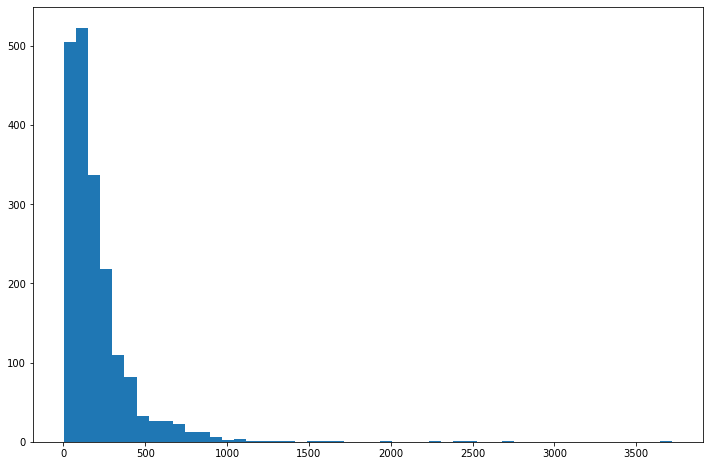

In [51]:
#Check length of text
seq_lens = [len(s) for s in sequences]
%matplotlib inline
plt.figure(figsize=(12,8))
import matplotlib.pyplot as plt
plt.hist(seq_lens, bins=50);

#### Getting x_train, x_text, y_train and y_test for modelling in the next steps

In [59]:
MAX_SEQUENCE_LENGTH = 150
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (1931, 150)
Shape of data test tensor: (483, 150)


In [60]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
y_test = to_categorical(np.asarray(y_test))

print('Shape of label tensor:', y_train.shape) #1931,9

Shape of label tensor: (1931, 9)


### Modelling

#### CBOW : Continuous Bag of Words

In [82]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50
N_CLASSES = 9

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['acc'])

In [83]:
#Model Fit with 12 epoches
model.fit(x_train, y_train, validation_split=0.1,
          nb_epoch=12, batch_size=128)

Train on 1737 samples, validate on 194 samples
Epoch 1/12
1737/1737 [==============================] - 0s 259us/step - loss: 2.1766 - acc: 0.3448 - val_loss: 2.1479 - val_acc: 0.4124
Epoch 2/12
1737/1737 [==============================] - 0s 233us/step - loss: 2.1278 - acc: 0.4191 - val_loss: 2.0941 - val_acc: 0.4124
Epoch 3/12
1737/1737 [==============================] - 0s 281us/step - loss: 2.0715 - acc: 0.4191 - val_loss: 2.0309 - val_acc: 0.4124
Epoch 4/12
1737/1737 [==============================] - 0s 238us/step - loss: 2.0060 - acc: 0.4191 - val_loss: 1.9566 - val_acc: 0.4124
Epoch 5/12
1737/1737 [==============================] - 0s 231us/step - loss: 1.9316 - acc: 0.4191 - val_loss: 1.8775 - val_acc: 0.4124
Epoch 6/12
1737/1737 [==============================] - 0s 233us/step - loss: 1.8560 - acc: 0.4191 - val_loss: 1.7998 - val_acc: 0.4124
Epoch 7/12
1737/1737 [==============================] - 0s 231us/step - loss: 1.7851 - acc: 0.4191 - val_loss: 1.7341 - val_acc: 0.4124
E

In [84]:
#Prediction
pred = model.predict(x_test) #Probability
y_classes = pred.argmax(axis=-1) #class
y_classes

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [85]:
le.inverse_transform(y_classes) #Transform index predictions to text

array(['Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Credit reporting, credit repair ser

In [86]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

#Training Accuracy: 0.4184
#Testing Accuracy:  0.4203

Training Accuracy: 0.4184
Testing Accuracy:  0.4203


#### LSTM: Long Short Term Memory

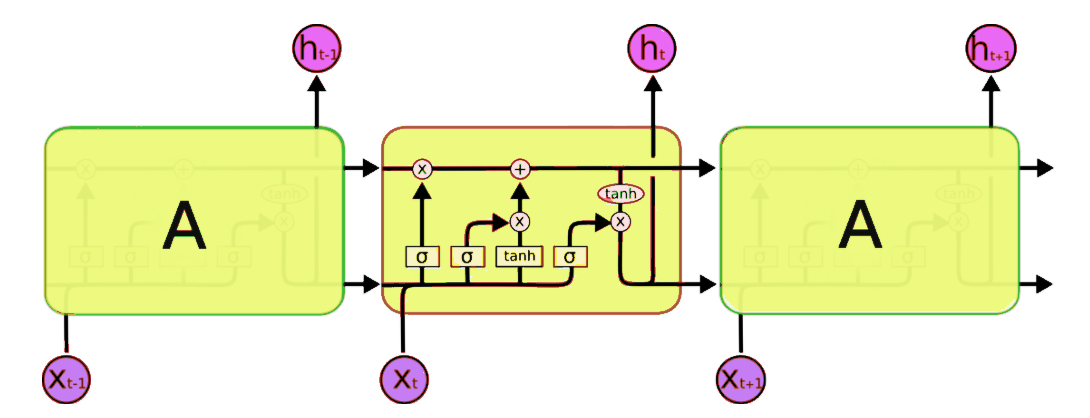

In [78]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

x = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedded_sequences)
predictions = Dense(9, activation='softmax')(x)


model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

#Model Fit with 12 epoches
model.fit(x_train, y_train, validation_split=0.1,
          nb_epoch=12, batch_size=256) 

Train on 1737 samples, validate on 194 samples
Epoch 1/12
1737/1737 [==============================] - 8s 4ms/step - loss: 2.0821 - acc: 0.3690 - val_loss: 1.8680 - val_acc: 0.4124
Epoch 2/12
1737/1737 [==============================] - 7s 4ms/step - loss: 1.6186 - acc: 0.4214 - val_loss: 1.6227 - val_acc: 0.4124
Epoch 3/12
1737/1737 [==============================] - 8s 4ms/step - loss: 1.4531 - acc: 0.4496 - val_loss: 1.5693 - val_acc: 0.4124
Epoch 4/12
1737/1737 [==============================] - 7s 4ms/step - loss: 1.2907 - acc: 0.4899 - val_loss: 1.4885 - val_acc: 0.4485
Epoch 5/12
1737/1737 [==============================] - 7s 4ms/step - loss: 1.1600 - acc: 0.6091 - val_loss: 1.4629 - val_acc: 0.4948
Epoch 6/12
1737/1737 [==============================] - 8s 5ms/step - loss: 1.0425 - acc: 0.7121 - val_loss: 1.5412 - val_acc: 0.5103
Epoch 7/12
1737/1737 [==============================] - 8s 5ms/step - loss: 0.9154 - acc: 0.7438 - val_loss: 1.5879 - val_acc: 0.4845
Epoch 8/12
1737

In [79]:
#Prediction
pred = model.predict(x_test)
y_classes = pred.argmax(axis=-1)
y_classes

array([3, 0, 3, 1, 0, 2, 2, 1, 3, 2, 2, 2, 1, 1, 1, 2, 2, 3, 2, 2, 3, 2,
       2, 0, 2, 0, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 5, 1, 2,
       2, 3, 2, 2, 2, 0, 2, 3, 2, 2, 2, 2, 0, 2, 0, 1, 2, 3, 1, 2, 3, 1,
       2, 1, 2, 2, 0, 3, 2, 2, 1, 3, 2, 2, 3, 1, 2, 2, 2, 0, 2, 2, 2, 3,
       1, 2, 2, 5, 1, 3, 2, 5, 0, 2, 2, 3, 2, 0, 2, 2, 2, 3, 1, 3, 1, 0,
       2, 2, 2, 0, 0, 5, 3, 3, 2, 3, 1, 5, 3, 2, 0, 3, 2, 0, 2, 3, 0, 0,
       2, 3, 3, 2, 5, 2, 0, 3, 0, 1, 2, 1, 0, 2, 0, 2, 2, 4, 2, 5, 0, 5,
       0, 3, 1, 2, 0, 3, 2, 5, 2, 1, 1, 2, 1, 2, 2, 2, 1, 3, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 1, 1, 2, 0, 1, 3, 1, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2,
       2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 3, 1, 2, 3, 1,
       1, 2, 2, 2, 2, 1, 3, 1, 1, 1, 2, 3, 5, 1, 2, 2, 2, 5, 1, 2, 3, 0,
       2, 0, 0, 2, 1, 1, 2, 5, 3, 3, 2, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       3, 1, 2, 5, 2, 5, 2, 5, 2, 5, 0, 2, 5, 5, 2,

In [80]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

#Training Accuracy: 0.8270
#Testing Accuracy:  0.6004

Training Accuracy: 0.8270
Testing Accuracy:  0.6004


### CNN - LSTM

In [87]:
# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)

# 1D convolution with 64 output channels
x = Conv1D(64, 5)(embedded_sequences)
# MaxPool divides the length of the sequence by 5
x = MaxPooling1D(5)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 5)(x)
x = MaxPooling1D(5)(x)
# LSTM layer with a hidden size of 64
x = Dropout(0.2)(x)
x = LSTM(64)(x)
predictions = Dense(9, activation='softmax')(x)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [88]:
#Model Fit with 12 epoches
model.fit(x_train, y_train, validation_split=0.1,
          nb_epoch=12, batch_size=128)

Train on 1737 samples, validate on 194 samples
Epoch 1/12
1737/1737 [==============================] - 2s 973us/step - loss: 1.8213 - acc: 0.4001 - val_loss: 1.6225 - val_acc: 0.4124
Epoch 2/12
1737/1737 [==============================] - 1s 735us/step - loss: 1.5867 - acc: 0.4387 - val_loss: 1.4679 - val_acc: 0.4485
Epoch 3/12
1737/1737 [==============================] - 1s 723us/step - loss: 1.4342 - acc: 0.5095 - val_loss: 1.3983 - val_acc: 0.4639
Epoch 4/12
1737/1737 [==============================] - 1s 845us/step - loss: 1.3393 - acc: 0.5222 - val_loss: 1.3651 - val_acc: 0.4948
Epoch 5/12
1737/1737 [==============================] - 1s 785us/step - loss: 1.2317 - acc: 0.5717 - val_loss: 1.3211 - val_acc: 0.5155
Epoch 6/12
1737/1737 [==============================] - 1s 796us/step - loss: 1.0779 - acc: 0.6454 - val_loss: 1.2362 - val_acc: 0.5773
Epoch 7/12
1737/1737 [==============================] - 1s 797us/step - loss: 0.9143 - acc: 0.7196 - val_loss: 1.2226 - val_acc: 0.5979
E

In [89]:
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

#Training Accuracy: 0.8861
#Testing Accuracy:  0.6729

#CNN-LSTM is the winning model with highest accuracy

Training Accuracy: 0.8861
Testing Accuracy:  0.6729


In [90]:
# https://realpython.com/python-keras-text-classification/

#Define a plot function to check history of Loss and Accuracy of the model
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [92]:
history = model.fit(x_train, y_train, validation_split=0.1,
          nb_epoch=12, batch_size=128)

Train on 1737 samples, validate on 194 samples
Epoch 1/12
1737/1737 [==============================] - 1s 720us/step - loss: 0.1000 - acc: 0.9758 - val_loss: 1.4995 - val_acc: 0.6392
Epoch 2/12
1737/1737 [==============================] - 1s 717us/step - loss: 0.0940 - acc: 0.9810 - val_loss: 1.5928 - val_acc: 0.6495
Epoch 3/12
1737/1737 [==============================] - 1s 757us/step - loss: 0.0886 - acc: 0.9781 - val_loss: 1.6691 - val_acc: 0.6237
Epoch 4/12
1737/1737 [==============================] - 1s 722us/step - loss: 0.0684 - acc: 0.9845 - val_loss: 1.7058 - val_acc: 0.6443
Epoch 5/12
1737/1737 [==============================] - 2s 873us/step - loss: 0.0624 - acc: 0.9879 - val_loss: 1.7039 - val_acc: 0.6392
Epoch 6/12
1737/1737 [==============================] - 1s 795us/step - loss: 0.0509 - acc: 0.9919 - val_loss: 1.7239 - val_acc: 0.6495
Epoch 7/12
1737/1737 [==============================] - 1s 795us/step - loss: 0.0490 - acc: 0.9896 - val_loss: 1.7666 - val_acc: 0.6392
E

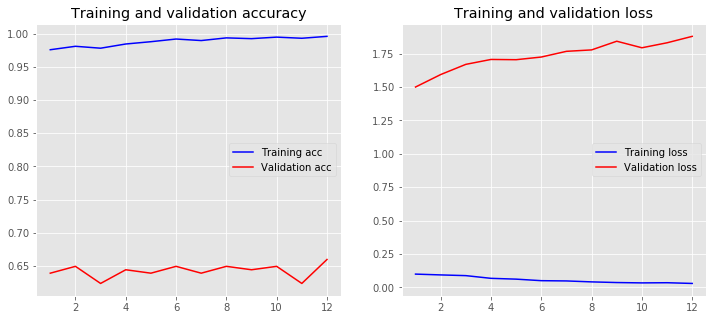

In [93]:
plot_history(history)

# SENTIMENT ANALYSIS

In [95]:
#Check test data
test2.info() #2414 obs, 3 vars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2414 entries, 0 to 2413
Data columns (total 3 columns):
Consumer complaint narrative    2414 non-null object
Product                         2414 non-null object
Target                          2414 non-null int32
dtypes: int32(1), object(2)
memory usage: 47.3+ KB


In [99]:
#Import packages
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\canyzn\AppData\Roaming\nltk_data...


In [100]:
def analyze_sentiment(df, column):
    sentiments = []
    sid = SentimentIntensityAnalyzer()
    for i in range(df.shape[0]):
        if i % 100 == 0:
            print(i)
        line = df[column].iloc[i]
        sentiment = sid.polarity_scores(line)
        sentiments.append([sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound']])
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1
    return df

In [101]:
analyze_sentiment(test2, 'Consumer complaint narrative')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400


,Consumer complaint narrative,Product,Target,neg,pos,neu,compound,Negative,Positive
0,"When I log in to my account summary, the "" Min...",Credit card or prepaid card,1,0.082,0.023,0.895,-0.6874,True,False
1,The Bank of America has decided to close my ac...,Checking or savings account,0,0.031,0.050,0.918,0.4878,False,True
2,"I am in process of purchasing house, currently...","Money transfer, virtual currency, or money ser...",4,0.022,0.037,0.942,0.2960,False,True
3,I am very concerned about the validity and acc...,"Credit reporting, credit repair services, or o...",2,0.115,0.084,0.801,-0.3848,True,False
4,On XX/XX/2019 I called in to make a final paym...,Student loan,7,0.085,0.080,0.835,0.1211,False,True
...,...,...,...,...,...,...,...,...,...
2409,On XXXX. I called and said I wanted to volunta...,Vehicle loan or lease,8,0.039,0.032,0.928,-0.0072,False,False
2410,I have been a customer of Wells Fargo for many...,Mortgage,5,0.000,0.133,0.867,0.9089,False,True
2411,I have been a victim of Identity Theft as well...,"Credit reporting, credit repair services, or o...",2,0.082,0.140,0.778,0.6124,False,True
2412,I sent all three credit bureaus a certified le...,"Credit reporting, credit repair services, or o...",2,0.153,0.156,0.691,0.3182,False,True


# POS (Part of Speech)

https://www.kaggle.com/rcushen/topic-modelling-with-lsa-and-lda

In [103]:
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [104]:
#Check data: extract 500 rows from the raw test data
raw_data = test.copy()
raw_data = raw_data[['Date received', 'Consumer complaint narrative']]
raw_data = raw_data.head(500)
raw_data.head()

,Date received,Consumer complaint narrative
0,1/27/2019,"When I log in to my account summary, the "" Min..."
1,12/31/2018,The Bank of America has decided to close my ac...
2,2/25/2019,"I am in process of purchasing house, currently..."
3,12/12/2018,I am very concerned about the validity and acc...
4,2/12/2019,On XX/XX/2019 I called in to make a final paym...


In [105]:
reindexed_data = raw_data['Consumer complaint narrative']
reindexed_data.index = raw_data['Date received']

In [106]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

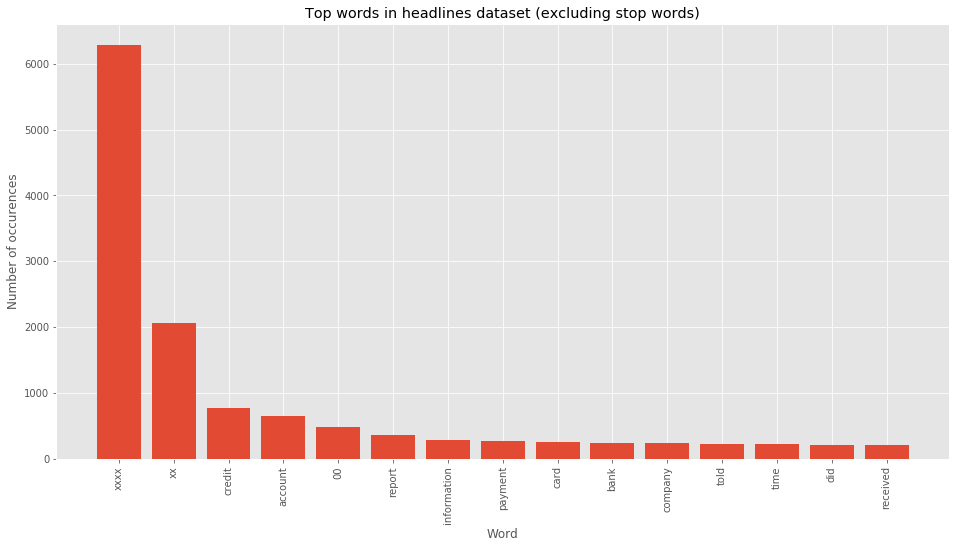

In [107]:
#Visualize words that are repeated frequently
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in headlines dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [110]:
#Import packages
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\canyzn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\canyzn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [111]:
#Using POS tag to identify POS of a word
tagged_headlines = [TextBlob(reindexed_data[i]).pos_tags for i in range(reindexed_data.shape[0])]

In [112]:
#Check one headline
tagged_headlines[0]

[('When', 'WRB'),
 ('I', 'PRP'),
 ('log', 'VBP'),
 ('in', 'IN'),
 ('to', 'TO'),
 ('my', 'PRP$'),
 ('account', 'NN'),
 ('summary', 'NN'),
 ('the', 'DT'),
 ('Minimum', 'JJ'),
 ('Payment', 'NN'),
 ('Due', 'NNP'),
 ('is', 'VBZ'),
 ('grey-ed', 'JJ'),
 ('out', 'IN'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('lighter', 'JJR'),
 ('font', 'NN'),
 ('than', 'IN'),
 ('the', 'DT'),
 ('Statement', 'NNP'),
 ('Balance', 'NNP'),
 ('the', 'DT'),
 ('Scheduled', 'JJ'),
 ('Payments', 'NNS'),
 ('amount', 'NN'),
 ('and', 'CC'),
 ('Available', 'JJ'),
 ('Credit', 'NNP'),
 ('Amount', 'NNP'),
 ('This', 'DT'),
 ('leads', 'VBZ'),
 ('me', 'PRP'),
 ('to', 'TO'),
 ('believe', 'VB'),
 ('that', 'IN'),
 ('there', 'EX'),
 ('is', 'VBZ'),
 ('no', 'DT'),
 ('minimum', 'JJ'),
 ('due', 'JJ'),
 ('or', 'CC'),
 ('that', 'IN'),
 ('I', 'PRP'),
 ('have', 'VBP'),
 ('already', 'RB'),
 ('payed', 'VBN'),
 ('it', 'PRP'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('misleading', 'VBG'),
 ('Also', 'RB'),
 ('XXXX', 'NN'),
 ('doe

In [113]:
#Putting headlines and POS into a data frame
tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

word_counts = [] 
pos_counts = {}

for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per headline: ', np.mean(word_counts))

Total number of words:  90020
Mean number of words per headline:  180.04


In [115]:
#Check the tagged headlines dataframe
tagged_headlines_df.head()

,tags
0,"[(When, WRB), (I, PRP), (log, VBP), (in, IN), ..."
1,"[(The, DT), (Bank, NNP), (of, IN), (America, N..."
2,"[(I, PRP), (am, VBP), (in, IN), (process, NN),..."
3,"[(I, PRP), (am, VBP), (very, RB), (concerned, ..."
4,"[(On, IN), (XX/XX/2019, NN), (I, PRP), (called..."


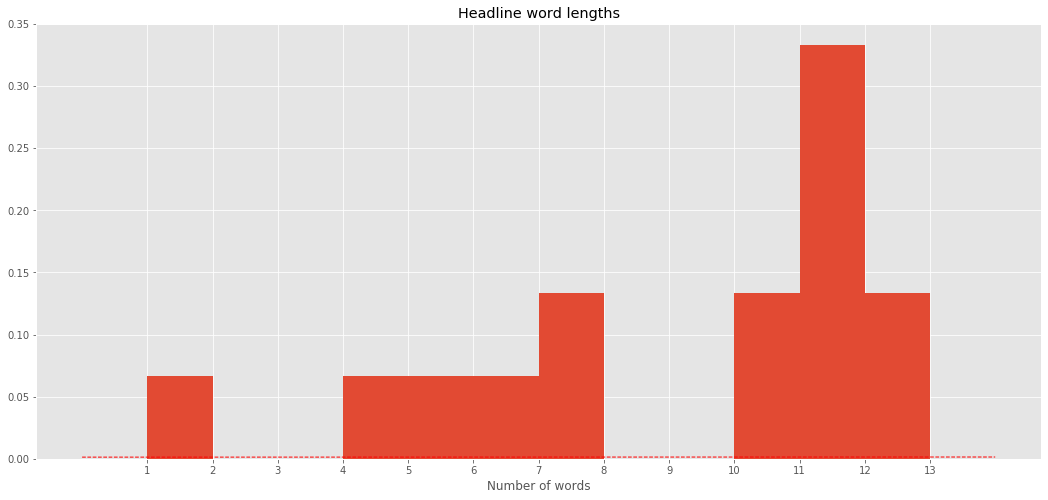

In [114]:
#Visualize word lengths in headlines
y = stats.norm.pdf(np.linspace(0,14,50), np.mean(word_counts), np.std(word_counts))

fig, ax = plt.subplots(figsize=(18,8))
ax.hist(word_counts, bins=range(1,14), density=True);
ax.plot(np.linspace(0,14,50), y, 'r--', linewidth=1);
ax.set_title('Headline word lengths');
ax.set_xticks(range(1,14));
ax.set_xlabel('Number of words');
plt.show()

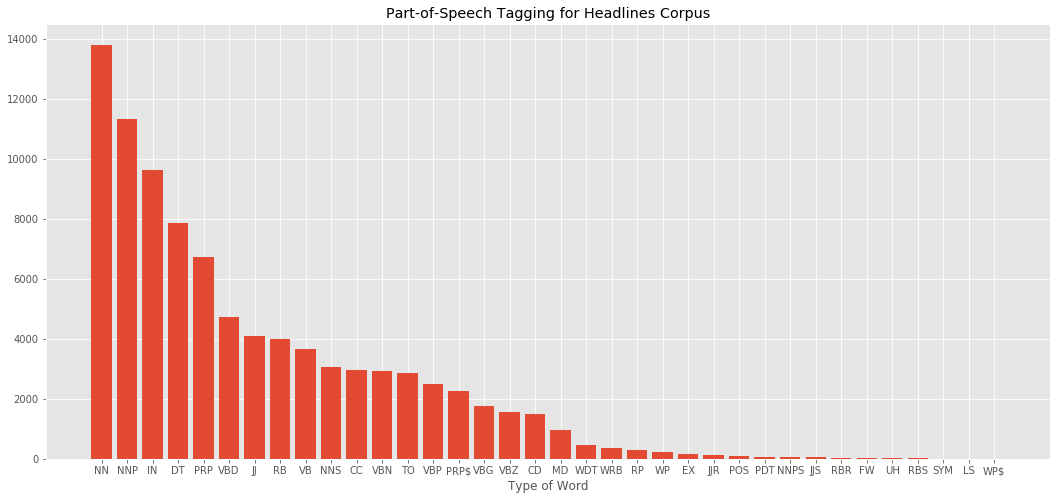

In [116]:
#Visualize POS of headlines
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for Headlines Corpus');
ax.set_xlabel('Type of Word');

# LDA: Latent Dirichlet Allocation for Topics 

In [119]:
# import dependencies
%matplotlib inline
!pip install gensim
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import LdaModel
from gensim import models, corpora, similarities
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

  Stored in directory: C:\Users\canyzn\AppData\Local\pip\Cache\wheels\27\65\38\8d7f5fe8d7afb4e4566587b2d1933cec185fba19257836c943
Successfully built smart-open
  Found existing installation: Cython 0.29.12
    Uninstalling Cython-0.29.12:
      Successfully uninstalled Cython-0.29.12


In [120]:
#Check the text data
test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [121]:
#Subset the text data with only columns of interest
papers = test[['Consumer complaint narrative','Product']].head(1000)
papers.rename(columns={'Consumer complaint narrative':'paper_text'},inplace=True)

In [122]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    when i log in to my account summary the " mini...
1    the bank of america has decided to close my ac...
2    i am in process of purchasing house currently ...
3    i am very concerned about the validity and acc...
4    on xx/xx/2019 i called in to make a final paym...
Name: paper_text_processed, dtype: object

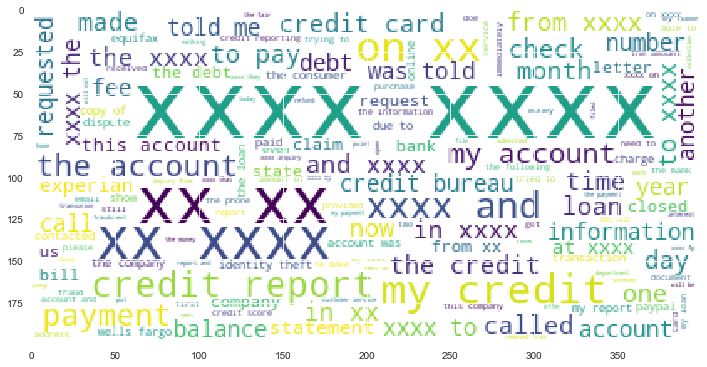

In [124]:
# Import the wordcloud library
!pip install wordcloud
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
plt.figure( figsize=(12,8) )
plt.imshow(wordcloud);
#wordcloud.to_image();

['000', '07', '0ffs', '10', '100', '1000', '10000', '100000', '1000000', '10000000', '1000s', '101', '101pts', '108', '1089', '1098', '1099', '10q', '10th', '11', '11000', '110000', '1100000', '12', '120', '1200', '12000', '120000', '1200000', '12000000', '12399', '13', '1300', '13000', '130000', '1300000', '14', '1400', '14000', '140000', '1400000', '14th', '15', '150', '1500', '15000', '150000', '1500000', '1501', '1541', '15mb', '16', '16000', '160000', '1600000', '1615', '1666', '1666b', '1681', '168123', '1681623', '1681a', '1681b', '1681c', '1681e', '1681g', '1681h', '1681i', '1681j', '1681m', '1681n', '1681o', '1681s', '1692', '1692f', '1692g', '1699', '17', '1700', '17000', '170000', '17000000', '177', '1799', '18', '180', '1800', '18000', '180000', '1800000', '18000000', '188', '18and', '19', '1900', '19000', '190000', '1900000', '1924', '1950', '1962e', '1984', '199', '1999', '1at', '1hr', '1identity', '1st', '1xxxx', '20', '200', '2000', '20000', '200000', '2000000', '2001',

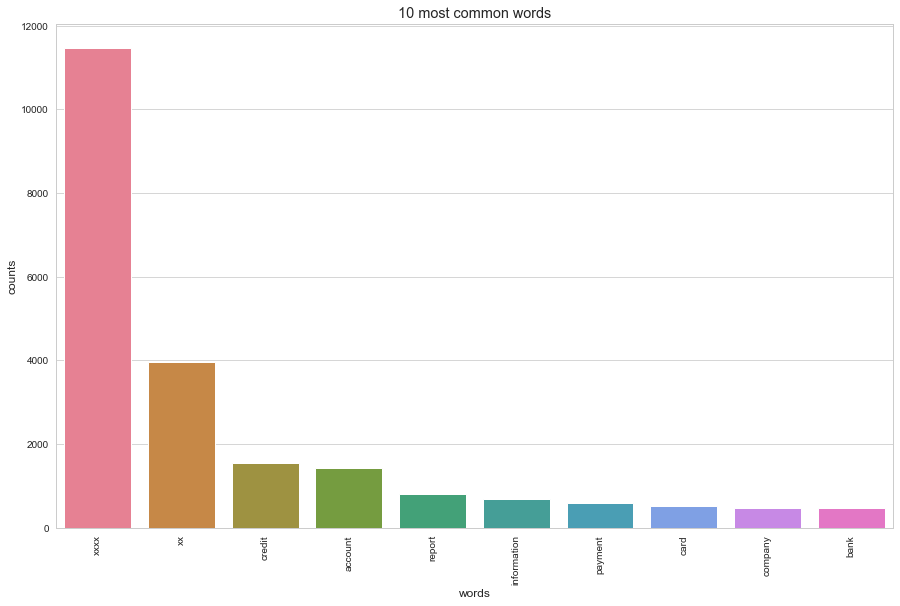

In [125]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    print(words)
    # words.remove('xxxx')
    # words.remove('xx')
    
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])
# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [127]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below
number_topics = 25
number_words = 10
# Create and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)
# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
xx account bank check xxxx money did told funds received

Topic #1:
experian account paid loan like inquiries xxxx usa told sent

Topic #2:
credit report xxxx information account reporting debt letter request sent

Topic #3:
xx bonus xxxx 2018 offer account days deposit checking terms

Topic #4:
information credit xx pay questions make security financial xxxx closed

Topic #5:
xxxx payment time real lien second mortgage tax loan request

Topic #6:
xx 18 sent kind type verification credit received bearing saying

Topic #7:
xxxx credit address report information xx equifax sent asked company

Topic #8:
xxxx xx credit report inquiry date oh information account mortgage

Topic #9:
xxxx xx card credit business new told pay offer department

Topic #10:
consumer identity information theft agency reporting block section shall report

Topic #11:
xxxx fp xx check account called payment mortgage insurance address

Topic #12:
pmi payment freedom xxxx released mortg